In [22]:
import pandas as p
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
print(tf.__version__)

2.4.1


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

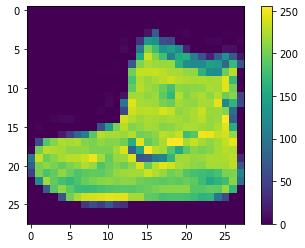

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
train_images.shape

(60000, 28, 28)

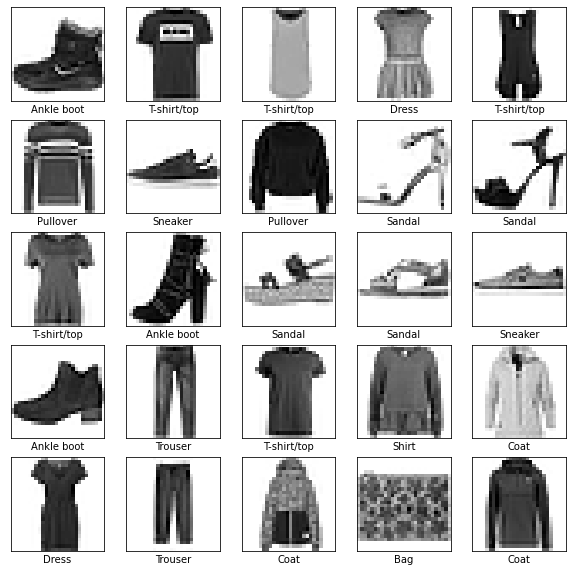

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 2s 835us/step - loss: 0.2323 - accuracy: 0.9125
Epoch 2/11
1875/1875 [==============================] - 1s 712us/step - loss: 0.2243 - accuracy: 0.9154
Epoch 3/11
1875/1875 [==============================] - 1s 704us/step - loss: 0.2173 - accuracy: 0.9185
Epoch 4/11
1875/1875 [==============================] - 1s 711us/step - loss: 0.2115 - accuracy: 0.9210
Epoch 5/11
1875/1875 [==============================] - 1s 723us/step - loss: 0.2041 - accuracy: 0.9241
Epoch 6/11
1875/1875 [==============================] - 1s 708us/step - loss: 0.1994 - accuracy: 0.9252
Epoch 7/11
1875/1875 [==============================] - 2s 970us/step - loss: 0.1941 - accuracy: 0.9278
Epoch 8/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1891 - accuracy: 0.9297
Epoch 9/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1837 - accuracy: 0.9312
Epoch 10/11
1875/1875 [==============================] - 2s 1ms/step

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3618 - accuracy: 0.8863

Test accuracy: 0.8863000273704529


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[0]

array([3.0968688e-09, 1.6932962e-10, 2.3260166e-10, 2.2703994e-12,
       1.2125719e-11, 2.4030292e-06, 2.8772257e-10, 2.0135337e-04,
       1.3084929e-10, 9.9979621e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

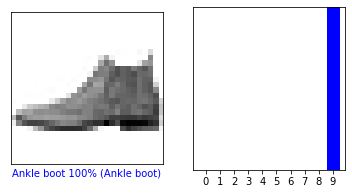

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

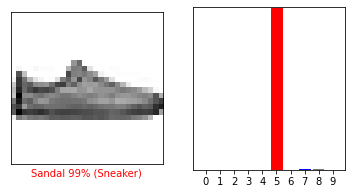

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

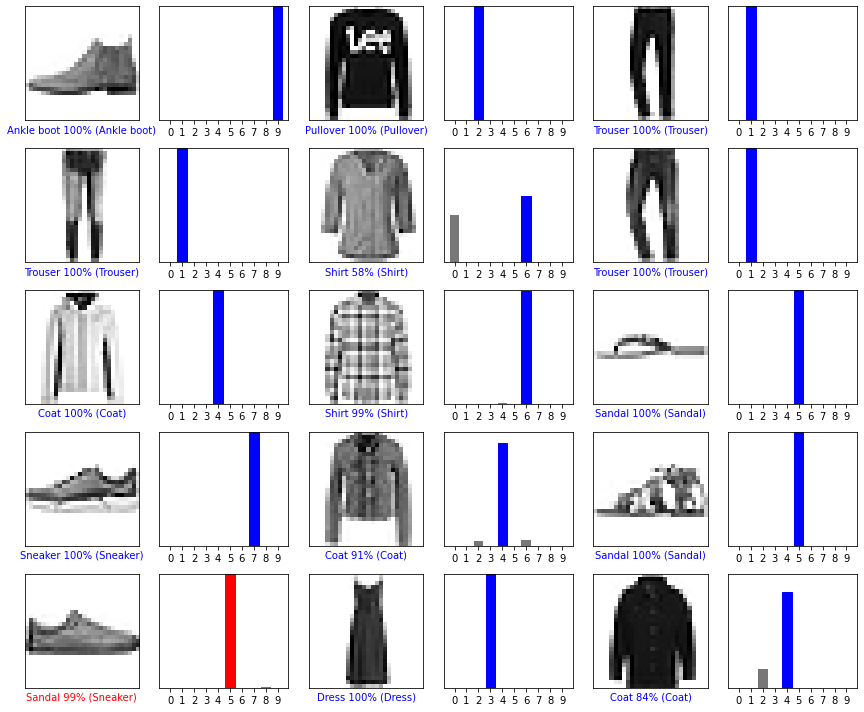

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.6355235e-05 2.1784798e-16 9.9944931e-01 4.4355416e-14 4.9418956e-04
  2.2387970e-12 2.0160134e-05 3.8511963e-29 5.5986688e-15 1.0565724e-21]]


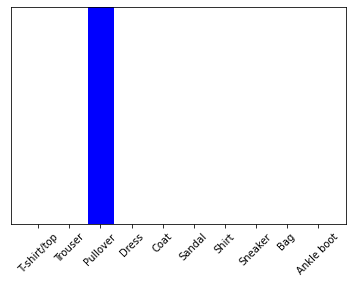

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

2